# Prepare a model for strength of concrete data using Neural Networks

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [2]:
# Importing necessary models for implementation of ANN
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense #, Activation,Layer,Lambda # dense means how many neurons

Using TensorFlow backend.
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\deshp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
a=100
from sklearn.model_selection import train_test_split


In [4]:
Concrete = pd.read_csv("C:\\Excelr Data\\Assignments\\Neural Networks\\concrete.csv")

Concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [5]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    # for the output layer we are not adding any activation function as 
    # the target variable is continuous variable 
    model.add(Dense(hidden_dim[-1]))
    # loss ---> loss function is means squared error to compare the output and estimated output
    # optimizer ---> adam
    # metrics ----> mean squared error - error for each epoch on entire data set 
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["mse"])
    return (model)


In [6]:
column_names = list(Concrete.columns)
column_names 

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

In [7]:
predictors = column_names[0:8]
predictors 

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

In [8]:
target = column_names[8]
target

'strength'

In [9]:
first_model = prep_model([8,50,1])
first_model

In [10]:
first_model.fit(np.array(Concrete[predictors]),np.array(Concrete[target]),epochs=30)



Epoch 1/30
1030/1030 [==============================] - 0s 298us/step - loss: 5051.8806 - mse: 5051.8799
Epoch 2/30
1030/1030 [==============================] - 0s 70us/step - loss: 320.8829 - mse: 320.8829
Epoch 3/30
1030/1030 [==============================] - 0s 73us/step - loss: 201.5915 - mse: 201.5915
Epoch 4/30
1030/1030 [==============================] - 0s 70us/step - loss: 173.9910 - mse: 173.9911
Epoch 5/30
1030/1030 [==============================] - 0s 57us/step - loss: 161.0674 - mse: 161.0674
Epoch 6/30
1030/1030 [==============================] - 0s 42us/step - loss: 145.7636 - mse: 145.7636
Epoch 7/30
1030/1030 [==============================] - 0s 36us/step - loss: 135.5175 - mse: 135.5174
Epoch 8/30
1030/1030 [==============================] - 0s 61us/step - loss: 127.5933 - mse: 127.5933
Epoch 9/30
1030/1030 [==============================] - 0s 41us/step - loss: 118.8723 - mse: 118.8723
Epoch 10/30
1030/1030 [==============================] - 0s 31us/step - loss: 

In [11]:
pred_train = first_model.predict(np.array(Concrete[predictors]))
pred_train

array([[22.615854],
       [25.691467],
       [25.485432],
       ...,
       [40.774517],
       [43.888794],
       [46.738224]], dtype=float32)

In [12]:
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

0       22.615854
1       25.691467
2       25.485432
3       26.188213
4       27.920107
          ...    
1025    19.718384
1026    55.844955
1027    40.774517
1028    43.888794
1029    46.738224
Length: 1030, dtype: float64

In [13]:
rmse_value = np.sqrt(np.mean((pred_train-Concrete[target])**2))
rmse_value

8.093834068831303

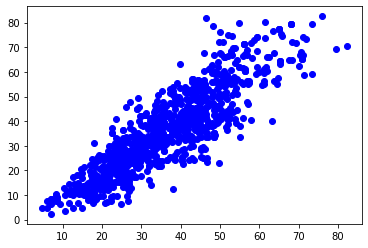

In [14]:
import matplotlib.pyplot as plt
plt.plot(pred_train,Concrete[target],"bo")


In [15]:
np.corrcoef(pred_train,Concrete[target]) # we got high correlation 


array([[1.        , 0.87657149],
       [0.87657149, 1.        ]])

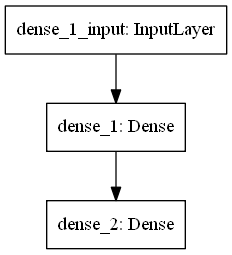

In [16]:
# small picture -  ANN network and its layers 
from keras.utils import plot_model
plot_model(first_model,to_file="first_model.png")
